<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

# Hacktiv8 PTP Introduction to Data Science Projects 3

Nama : Nabila Zulfika Hemadewi\
Tanggal Penulisan : 9 April 2022

<h3 id="project-overview">Project Overview</h3>
<p>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</p>
<p>There are four datasets:</p>
<ol>
    <li><strong>bank-additional-full.csv</strong> with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]</li>
    <li><strong>bank-additional.csv</strong> with 10% of the examples (4119), randomly selected from 1), and 20 inputs.</li>
    <li><strong>bank-full.csv</strong> with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).</li>
    <li><strong>bank.csv</strong> with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).</li>
</ol>
<p>The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).<br><br>The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).</p>
<p>This dataset contains:</p>
<p>Input variables:</p>
<p><strong># bank client data:</strong>
    <br>1 - age (numeric)
    <br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    <br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    <br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    <br>5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
    <br>6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
    <br>7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
    <br># related with the last contact of the current campaign:
    <br>8 - contact: contact communication type (categorical: 'cellular', 'telephone')
    <br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    <br>10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
    <br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</p>
<p><strong># other attributes:</strong>
    <br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    <br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    <br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
    <br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br># social and economic context attributes
    <br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    <br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    <br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    <br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    <br>20 - nr.employed: number of employees - quarterly indicator (numeric)
    <br><br>
    <strong>Output variable (desired target):</strong>
    <br>21 - y - has the client subscribed a term deposit? (binary: '<strong>yes</strong>', '<strong>no</strong>')</p>

## Step 1: Import modules
Pertama-tama kita import semua modul yang akan digunakan untuk menganalisis dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Numpy
NumPy (Python Numerik) adalah ekstensi open source dari Python Numerical komputasi. Alat ini dapat digunakan untuk menyimpan dan memproses matriks besar. Numpy jauh lebih efisien daripada struktur nested list Python sendiri. NumPy mendukung operasi array dan matriks beberapa dimensi. Selain itu juga menyediakan sejumlah besar perpustakaan matematika untuk operasi array Dan digunakan di hampir setiap bidang sains dan teknik.

Pandas
Pandas adalah tools analisis dan manipulasi data open source yang cepat, powerful, fleksibel, dan mudah digunakan, pandas dibuat pemrograman Python. Pandas menawarkan struktur data dan banyak operasi untuk memanipulasi data. Pandas memungkinkan banyak operasi manipulasi data seperti penggabungan, pembentukan kembali, pembersihan dan fitur perselisihan data.

Matplotlib
Matplotlib adalah suatu library atau package yang paling populer di bahasa python untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih. Setiap sumbu memiliki sumbu horizontal (x) dan sumbu vertikal (y).Salah satu aspek inti Matplotlib adalah matplotlib.pyplot. matplotlib.pyplot adalah kumpulan fungsi gaya perintah yang membuat Matplotlib berfungsi seperti MATLAB. Setiap fungsi pyplot membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, membuat plot beberapa garis di area plotting, menghiasi plot dengan label, dll.

Scikit-learn 
Scikit-learn atau sklearn merupakan sebuah module dari bahasa pemrograman Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.

Seaborn
Seaborn adalah library untuk visualisasi data yang dibangun di atas matplotlib. Seaborn memiliki lebih banyak fungsi untuk visualisasi data dan lebih mudah digunakan.

## Step 2: Import Dataset
Selanjutnya kita import dataset yang telah di download di link = https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
Untuk data train menggunakan dataset full sedangkan data test menggunakan 10% dari dataset full.

In [2]:
df_train = pd.read_csv('datasets/bank-additional/bank-additional-full.csv', delimiter=";")
df_test = pd.read_csv('datasets/bank-additional/bank-additional.csv', delimiter=";")

## Step 3: Exploring Dataset

In [3]:
df_train.head() #untuk mengetahui 5 baris teratas dari tabel dataset data train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_train.tail() #untuk mengetahui 5 baris terbawah dari tabel dataset data train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df_train.info() #untuk mengetahui informasi dari dataset data train yang telah di import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_test.head() #untuk mengetahui 5 baris teratas dari tabel dataset data test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
df_test.tail() #untuk mengetahui 5 baris terbawah dari tabel dataset data test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [8]:
df_test.info() #untuk mengetahui informasi dari dataset data test yang telah di import

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [9]:
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

In [10]:
df_train.duplicated().any()

False

In [11]:
df_train.isnull().sum() #mengecek missing values berupa nilai NA pada dataset data train

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df_train = df_train.drop(columns=['duration']) #mendrop kolom yang tidak penting dalam dataset data train
df_test = df_test.drop(columns=['duration']) #mendrop kolom yang tidak penting dalam dataset data test

In [14]:
#mengkategorikan nama kolom berdasarkan tipe data
columns_numerical = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_bool = ['y']

## Visualization

In [15]:
df_deposit = df_train['y'].value_counts()
df_deposit

no     36537
yes     4639
Name: y, dtype: int64

In [16]:
labels=df_train['y'].unique()
labels

array(['no', 'yes'], dtype=object)

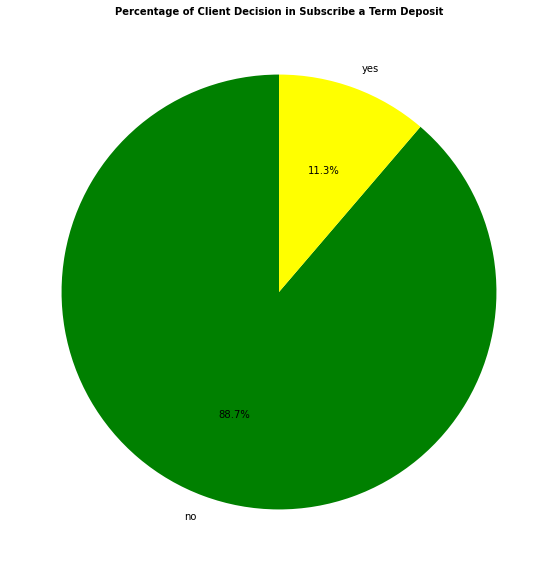

In [17]:
plt.figure(figsize=(10,10))
colors=['green','yellow']
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab=plt.pie(df_deposit, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

Dari pie chart di atas dapat dilihat bahwa sebanyak 88.7% memilih untuk tidak menggunakan deposito dan hanya 11.3% yang memilih menggunakan deposito.

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
for col in columns_categorical:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col]) #mentransformasi data categorical ke data numeric

In [20]:
for col in columns_bool:
    df_train.loc[df_train[col]=='no', col] = 0
    df_train.loc[df_train[col]=='yes', col] = 1 #mentransformasi data binary ke data boolean

In [21]:
for col in columns_bool:
    df_test.loc[df_test[col]=='no', col] = 0
    df_test.loc[df_test[col]=='yes', col] = 1 #mentransformasi data binary ke data boolean

In [22]:
df_train = df_train[df_train[col].isin([0,1])]
df_test = df_test[df_test[col].isin([0,1])] #menghapus data yang memiliki hasil unknown

In [23]:
#x_train dan y_train
x_arr = df_train[columns_features].to_numpy()
x_train = x_arr
y_arr = df_train['y'].astype('int')
y_arr = y_arr.to_numpy()
y_train = y_arr

In [24]:
#x_test dan y_test
x_arr = df_test[columns_features].to_numpy()
x_test = x_arr
y_arr = df_test['y'].astype('int')
y_arr = y_arr.to_numpy()
y_test = y_arr

## Classification
### Logistic Regression

In [25]:
modreg = linear_model.LogisticRegression()
modreg.fit(x_train,y_train)
y_predict = modreg.predict(x_test)

C:\Users\PakZul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


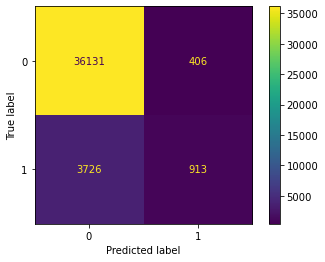

In [26]:
plot_confusion_matrix(modreg, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 36131 prediksi true negatif : 36131 data prediksi benar dinyatakan sebagai nol
- 3726 prediksi false negatif: 3726 data prediksi salah dinyatakan sebagai nol.
- 409 prediksi false positif: 409 data prediksi salah dinyatakan sebagai satu.
- 913 prediksi positif yang benar: 913 data prediksi benar dinyatakan sebagai satu.

### K-Nearest Neighbor (KNN)

In [27]:
error = []

In [28]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

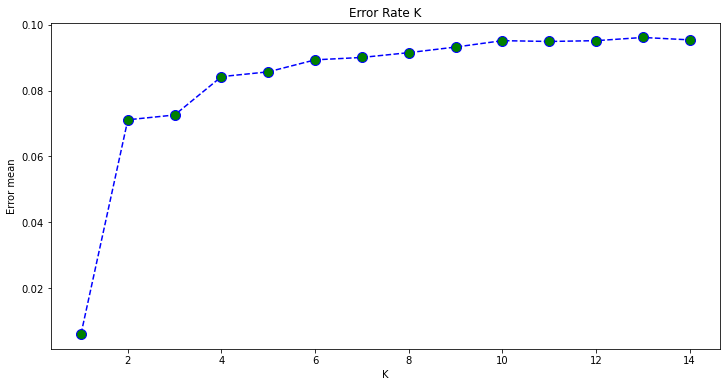

In [29]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan angka Error Rate K, nilai K diputuskan pada 6 karena tidak ada peningkatan signifikan terhadap kesalahan berarti dari 7 ke atas.

In [30]:
modknn = KNeighborsClassifier(n_neighbors=6)
modknn.fit(x_train, y_train)
y_predict = modknn.predict(x_test)

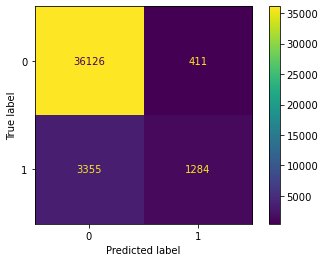

In [31]:
plot_confusion_matrix(modknn, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 36126 prediksi true negatif : 36126 data prediksi benar dinyatakan sebagai nol
- 3355 prediksi false negatif: 3355 data prediksi salah dinyatakan sebagai nol.
- 411 prediksi false positif: 411 data prediksi salah dinyatakan sebagai satu.
- 1284 prediksi positif yang benar: 1284 data prediksi benar dinyatakan sebagai satu.

### Support Vector Machine

In [32]:
modsvm = svm.SVC(kernel='linear')
modsvm.fit(x_train, y_train)
y_predict = modsvm.predict(x_test)

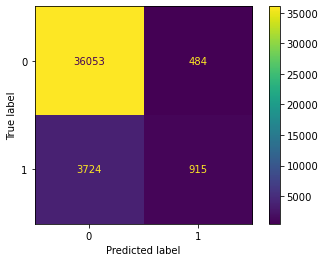

In [33]:
plot_confusion_matrix(modsvm, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 36053 prediksi true negatif : 36053 data prediksi benar dinyatakan sebagai nol
- 3724 prediksi false negatif: 3724 data prediksi salah dinyatakan sebagai nol.
- 484 prediksi false positif: 484 data prediksi salah dinyatakan sebagai satu.
- 915 prediksi positif yang benar: 915 data prediksi benar dinyatakan sebagai satu.

### Decision Tree Classifier

In [34]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 1}

In [35]:
moddct = DecisionTreeClassifier(max_depth=1, criterion='entropy')
moddct.fit(x_train, y_train)
y_predict = moddct.predict(x_test)

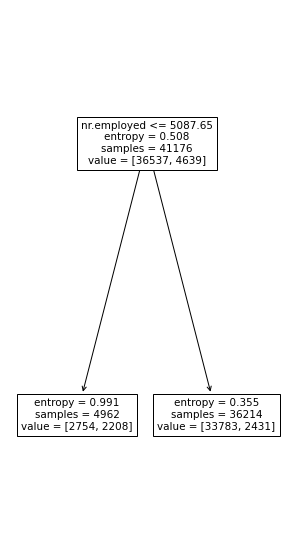

In [36]:
figure, ax = plt.subplots(figsize=(5,10))
tree.plot_tree(moddct, ax=ax, feature_names=columns_features)
plt.show()

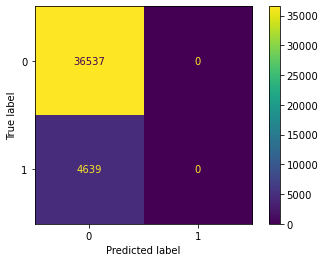

In [37]:
plot_confusion_matrix(moddct, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 36537 prediksi true negatif : 36537 data prediksi benar dinyatakan sebagai nol
- 4639 prediksi false negatif: 4639 data prediksi salah dinyatakan sebagai nol.
- 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
- 0 prediksi positif yang benar: 0 data prediksi benar dinyatakan sebagai satu.

### Random Forest Classifier

In [38]:
modrdf = RandomForestClassifier(max_depth=3, criterion='entropy')
modrdf.fit(x_train, y_train)
y_predict = modrdf.predict(x_test)

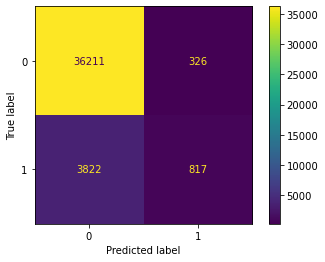

In [39]:
plot_confusion_matrix(modrdf, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 36211 prediksi true negatif : 36211 data prediksi benar dinyatakan sebagai nol
- 3822 prediksi false negatif: 3822 data prediksi salah dinyatakan sebagai nol.
- 326 prediksi false positif: 326 data prediksi salah dinyatakan sebagai satu.
- 817 prediksi positif yang benar: 817 data prediksi benar dinyatakan sebagai satu.

### Naive Bayes

In [40]:
modnbg = GaussianNB()
modnbg.fit(x_train, y_train)
y_predict = modnbg.predict(x_test)

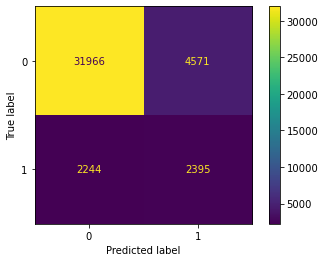

In [41]:
plot_confusion_matrix(modnbg, x_train, y_train)

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

- 31966 prediksi true negatif : 31966 data prediksi benar dinyatakan sebagai nol
- 2244 prediksi false negatif: 2244 data prediksi salah dinyatakan sebagai nol.
- 4571 prediksi false positif: 4571 data prediksi salah dinyatakan sebagai satu.
- 2395 prediksi positif yang benar: 2395 data prediksi benar dinyatakan sebagai satu.

### Accuracy

In [42]:
listmodel = [modreg,modknn,modsvm,moddct,modrdf,modnbg]
result = []
for mod in listmodel:
    a = mod.score(x_train, y_train)
    b = mod.score(x_test, y_test)
    result.append(
        {
            mod: {
                'score_train': a,
                'score_test': b
            }
        })
    
result

[{LogisticRegression(): {'score_train': 0.8996502817175054,
   'score_test': 0.9019179412478757}},
 {KNeighborsClassifier(n_neighbors=6): {'score_train': 0.9085389547309112,
   'score_test': 0.9106579266812334}},
 {SVC(kernel='linear'): {'score_train': 0.8978045463376725,
   'score_test': 0.9002184996358339}},
 {DecisionTreeClassifier(criterion='entropy', max_depth=1): {'score_train': 0.8873372838546726,
   'score_test': 0.890507404709881}},
 {RandomForestClassifier(criterion='entropy', max_depth=3): {'score_train': 0.8992617058480669,
   'score_test': 0.9024034959941734}},
 {GaussianNB(): {'score_train': 0.8344909656110355,
   'score_test': 0.8327263899004613}}]

Untuk memprediksi apakah client akan subscribe (yes/no) sebuah deposito dari data bank tersebut, algoritma yang paling sesuai untuk digunakan yaitu KNN.
Dapat dilihat pada tabel bahwa KNN memiliki nilai accuracy tertinggi yaitu 0.910 atau 91%.